# Entrega 4 - Modelos de segmentación

**Autores :
  + Integrante 1: Jocsan Riquelme Mella
  + Integrante 2: Luis Campos Cáceres


**Correo Electrónico:**
  + Integrante 1: jocsan.riquelme2201@alumnos.ubiobio.cl
  + Integrante 2: luis.campos2201@alumnos.ubiobio.cl

**Fecha de Creación:** 5 de Julio 2025

**Versión:** 1.0  



---

## Descripción


Este notebook contiene el desarrollo de la evaluación 4 de la asignatura de Inteligencia Artificial de la carrera de Ingeniería en Informática - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (2.0.2)
- pandas (2.2.2)
- matplotlib (3.10.0)
- seaborn (0.13.2)
- sklearn (1.6.1)
- kneed (0.8.5)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

In [32]:
#Instalar kneed -> necesario para saber el número optimo de  clusters
!pip install kneed

In [33]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/datos_segmentacion.csv

--2025-07-11 03:14:20--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/datos_segmentacion.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159876 (156K) [text/plain]
Saving to: ‘datos_segmentacion.csv.1’

datos_segmentacion. 100%[===================>] 156.13K  --.-KB/s    in 0.03s   

2025-07-11 03:14:20 (4.54 MB/s) - ‘datos_segmentacion.csv.1’ saved [159876/159876]



#Actividades Iniciales

In [34]:
#Importar librerias#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from kneed import KneeLocator

#Carga de la data

In [35]:
data=pd.read_csv('datos_segmentacion.csv')
data.head(5)

,actividad_fisica,pasos_diarios,calorias_gastadas,horas_de_sueno,nivel_descanso
0,5.75,11278.26,2230.18,7.40,75.74
1,4.79,9358.50,1886.49,7.48,76.19
2,5.97,11045.24,2328.88,7.55,70.77
3,7.28,14404.04,2924.86,8.16,84.53
4,4.65,9663.95,1979.23,6.98,62.32


In [36]:
data.shape

(5000, 5)

**Interpretación**
+ Existen 5000 usuarios
+ De cada usuario se tienen 5 características

In [37]:
data.describe()

,actividad_fisica,pasos_diarios,calorias_gastadas,horas_de_sueno,nivel_descanso
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5.008396,10011.868760,2004.416454,7.511548,75.023856
std,1.494725,3030.930957,605.897772,0.702341,8.428917
min,0.140000,-266.630000,44.960000,4.800000,43.940000
25%,4.010000,7974.792500,1597.297500,7.030000,69.520000
50%,5.020000,10017.085000,2009.215000,7.510000,75.115000
75%,6.000000,12028.565000,2396.437500,7.990000,80.720000
max,10.890000,21589.360000,4455.140000,10.640000,113.120000


**Interpretación**
+ Pasos diarios
  + Una importante concentración de los usuarios camina una cantidad de pasos diarios dentro del intervalo [6981; 13041], correspondiente al rango [μ−σ; μ+σ] de pasos diarios.

  + El 75% de los usuarios camina a lo más 12.029 pasos diarios.

  + El 25% de los usuarios camina a lo más 7.975 pasos diarios.

+ Calorias gastadas
  +  Una importante concentración de los usuarios quema una cantidad de calorías promedio por actividad dentro del intervalo [1399; 2609], correspondiente al rango [μ−σ; μ+σ] de calorías quemadas.

  +  El 75% de los usuarios quema a lo más 2.396 calorías por actividad.

  +  El 25% de los usuarios quema a lo más 1.597 calorías por actividad.



#Revisión de variables


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   actividad_fisica   5000 non-null   float64
 1   pasos_diarios      5000 non-null   float64
 2   calorias_gastadas  5000 non-null   float64
 3   horas_de_sueno     5000 non-null   float64
 4   nivel_descanso     5000 non-null   float64
dtypes: float64(5)
memory usage: 195.4 KB


**Interpretación**
+ Se aprecia la existencia de 5 variables cuantitativas.
+ No se aprecia la existencia de valores nulos.

# Objetivos



## Contexto de Negocio para Segmentación

**Nombre del proyecto:** Segmentación de Usuarios de una App de Bienestar Integral

**Contexto:**
Una startup tecnológica ha desarrollado una aplicación móvil llamada **ViveFit**, orientada a mejorar el bienestar de las personas mediante el monitoreo de su actividad física y calidad del descanso.

A través de sensores y autodiagnóstico diario, la aplicación recolecta las siguientes variables continuas para cada usuario:

* `actividad_fisica`: horas promedio de ejercicio semanal.
* `pasos_diarios`: promedio de pasos diarios registrados.
* `calorias_gastadas`: estimación promedio de calorías quemadas por actividad.
* `horas_de_sueno`: promedio de horas de sueño nocturno.
* `nivel_descanso`: índice (numérico) que refleja cuán descansado se siente el usuario (basado en sueño y hábitos).

**Objetivo de análisis:**
La empresa desea **segmentar a sus usuarios** para personalizar recomendaciones, notificaciones y planes de entrenamiento. El equipo de analítica ha decidido aplicar técnicas de **reducción de dimensionalidad con PCA**, con el fin de visualizar la estructura de los datos y mejorar la calidad de segmentación.

---

## Actividades

### Modelo usando 2 variables
1. Justificar la selección de 2 variables **(5 puntos)**
2. Elegir la cantidad óptima de clusters **(3 puntos)**
3. Aplicar **KMeans** usando 2 variables y evaluar la calidad de los grupos generados. **(2 puntos)**
4. Visualizar los grupos generados mostrando los centroides de cada grupo. **(3 puntos)**
5. Mostrar los **centroides en escala original**. **(3 puntos)**
6. Interpretar un **centroide en escala original**. **(3 puntos)**
### Modelo usando 4 o más variables
7. Justificar la selección de las variables **(5 puntos)**
8. Elegir la cantidad óptima de clusters **(3 puntos)**
9. Aplicar **KMeans** usando las variables seleccionadas y evaluar la calidad de los grupos generados. **(2 puntos)**
10. Mostrar los **centroides en escala original**. **(3 puntos)**
11. Interpretar un **centroide en escala original**. **(3 puntos)**
12. **Aplicar PCA** sobre los datos escalados y argumentar cuántos componentes principales retendrán. **(5 puntos - 1 punto aplicar PCA y 4 por argumentar correctamente)**
13. Visualizar la **varianza explicada acumulada** para justificar la elección. **(2 puntos)**
14. Mostrar los **centroides en escala original**. **(3 puntos)**



---

## Penalizaciones
+ Ausencia de datos de autores - 10% de la calificación final
+ Falta de aplicación de buenas prácticas - 10% de la calificación final
* Faltas en redacción y ortografía - 10% de la calificación final

---


## Modelo de segmentación usando 2 variables

### Selección y justificación de variables

**Variables Elegidas y Porqué**

- Para esta segmentación se eligieron las variables actividad_fisica y horas_de_sueno, ya que reflejan directamente los dos pilares fundamentales que la aplicación busca mejorar: el nivel de actividad física semanal y la calidad del descanso nocturno. Este enfoque es coherente con el propósito central de la app, que es promover tanto el movimiento regular como buenos hábitos de sueño entre sus usuarios.

In [39]:
#Crear un data frame con las variables
features=['actividad_fisica','horas_de_sueno']
dataFrameSimple=data[features]
dataFrameSimple.head(5)

,actividad_fisica,horas_de_sueno
0,5.75,7.40
1,4.79,7.48
2,5.97,7.55
3,7.28,8.16
4,4.65,6.98


**Escalar las caracteristicas**

Es necesario escalar las características, ya que presentan diferentes magnitudes. Al utilizar KMeans, que se basa en distancias, esto asegura que ambas variables tengan el mismo peso en la formación de los clústeres.

In [40]:
scaler=StandardScaler()
Xscaled=scaler.fit_transform(dataFrameSimple)

### Elección del número de cluster óptimo

Debemos encontrar el número óptimo de clusters para el Kmeans

In [41]:
sse = []
for k in range(2, 21):
  kkmeans = KMeans(n_clusters=k, n_init="auto", random_state = 29).fit(Xscaled)
  sse.append(kkmeans.inertia_)
kl = KneeLocator(range(2, 21), sse, curve="convex", direction="decreasing")

print("El codo está en k =", kl.elbow)
print("El SSE =", np.round(kl.all_elbows_y, 2))

El codo está en k = 6
El SSE = [2510.24]


**Visualizar la cantidad de clusters óptimo**

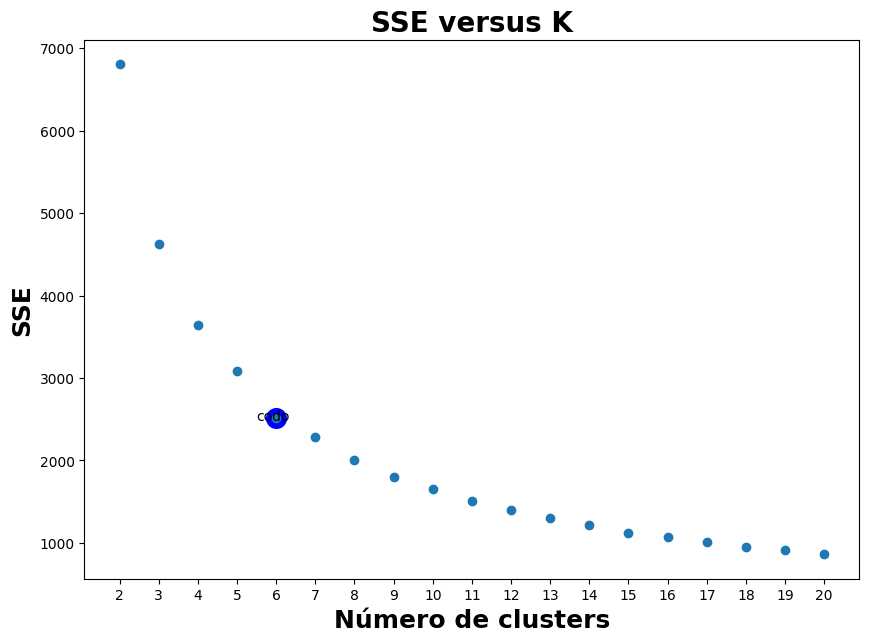

In [42]:
fig, ax = plt.subplots(figsize = (10, 7))

# estas dos lineas se agregan para que se vea la elección de KneeLocator para el codo en este gráfico
ax.scatter(kl.elbow, sse[kl.elbow-2], color='blue', s=200) # agrega un punto rojo al plot de tamaño s=200 en el lugar donde se encuentra el codo
ax.text(kl.elbow-.5, sse[kl.elbow-2]-25, s="codo")       # agrega un texto abajo para indicar qué representa el punto

# estas lineas son el grafico de SS vs K
ax.scatter(range(2, 21), sse)
ax.set_xticks(range(2, 21))
ax.set_xlabel("Número de clusters", fontsize=18, fontweight="bold")
ax.set_ylabel("SSE", fontsize=18, fontweight="bold")
plt.title("SSE versus K", fontsize=20, fontweight="bold")
plt.show()

**Interpretación**
Para complementar el cálculo anterior, se observa en la curva del SSE que a partir de k = 6 la mejora al aumentar los clusters es marginal.
Esto sugiere que 6 es un número óptimo de clusters, ya que valores mayores no reducen significativamente el error.
Aunque pueden existir pequeñas variaciones entre ejecuciones, el valor se ha mantenido estable en k = 6.

### Creación y entrenamiento del modelo

In [43]:
# KMeans (usa el k que ya determinaste, o repite el método del codo si quieres optimizar para estas variables)
kmeans_x = KMeans(n_clusters=kl.elbow, n_init=10, random_state=29)
grupos = kmeans_x.fit_predict(Xscaled)
dataFrameSimple = dataFrameSimple.copy()
dataFrameSimple['grupo'] = grupos

### Evaluación del modelo

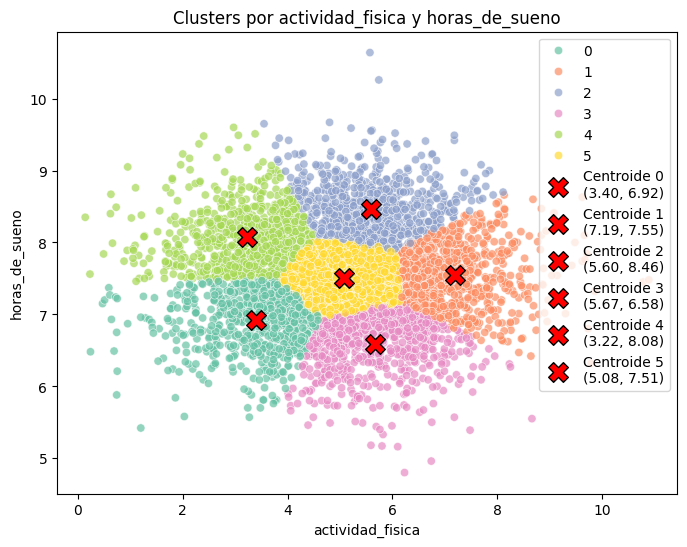

In [44]:
# Centroides en escala original
centroides = scaler.inverse_transform(kmeans_x.cluster_centers_)

# Visualización
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=features[0],
    y=features[1],
    hue='grupo',
    data=dataFrameSimple,
    palette='Set2',
    alpha=0.7
)
for i, (cx, cy) in enumerate(centroides):
    plt.scatter(cx, cy, c='red', marker='X', s=200, edgecolor='black', label=f'Centroide {i}\n({cx:.2f}, {cy:.2f})')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="best")
plt.title(f'Clusters por {features[0]} y {features[1]}')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()

In [45]:
# Se calcula el índice de silueta para la segmentación obtenida
silhouette = silhouette_score(Xscaled, grupos)
print(f"Índice de silueta: {silhouette:.3f}")

Índice de silueta: 0.325


**Análisis  Y evaluación de los grupos generados**

El índice de silueta obtenido para la segmentación basada en las variables pasos_diarios y calorias_gastadas es de 0.325 Este valor sugiere que los grupos formados por el modelo KMeans presentan una separación un poco baja pero razonable, es decir, la mayoría de los usuarios dentro de cada cluster comparten características similares y existe una diferenciación apreciable respecto a los demás grupos. Sin embargo, también indica que aún podría haber cierto grado de solapamiento entre algunos clusters debido a la falta de relacion entre las variables.

In [46]:
# Se muestran los valores de los centroides en unidades originales
print("Centroides de los clusters en escala original (actividad_fisica, horas_de_sueno):")
for i, (cx, cy) in enumerate(centroides):
    print(f"Grupo {i}: Actividad física = {cx:.2f} horas/semana, Horas de sueño = {cy:.2f} horas/noche")


Centroides de los clusters en escala original (actividad_fisica, horas_de_sueno):
Grupo 0: Actividad física = 3.40 horas/semana, Horas de sueño = 6.92 horas/noche
Grupo 1: Actividad física = 7.19 horas/semana, Horas de sueño = 7.55 horas/noche
Grupo 2: Actividad física = 5.60 horas/semana, Horas de sueño = 8.46 horas/noche
Grupo 3: Actividad física = 5.67 horas/semana, Horas de sueño = 6.58 horas/noche
Grupo 4: Actividad física = 3.22 horas/semana, Horas de sueño = 8.08 horas/noche
Grupo 5: Actividad física = 5.08 horas/semana, Horas de sueño = 7.51 horas/noche


**Análisis**

+ Cluster 4:
El centroide del Grupo 4 presenta un valor promedio de 3,22 horas de actividad física por semana y 8,08 horas de sueño por noche. Este perfil corresponde a usuarios que duermen una cantidad considerable de horas, por encima del promedio, pero realizan poca actividad física semanal. Las personas de este grupo pueden estar priorizando el descanso, pero podrían beneficiarse de estrategias enfocadas en incrementar su nivel de actividad física, como recomendaciones de rutinas sencillas o notificaciones motivacionales, con el objetivo de mejorar su bienestar integral.


## Modelo de segmentación usando 4 o más variables

### Selección de las variables

**Selección de variables y porqué**

Se decidió utilizar las cinco variables recolectadas de los usuarios; actividad_fisica, pasos_diarios, calorias_gastadas, horas_de_sueno y nivel_descanso— debido a que, en conjunto, representan de forma integral el estilo de vida de los usuarios, cubriendo dos pilares clave del bienestar personal: movimiento físico y descanso.

In [47]:
dataFrameAll=data.copy()
dataFrameAll.head(5)

,actividad_fisica,pasos_diarios,calorias_gastadas,horas_de_sueno,nivel_descanso
0,5.75,11278.26,2230.18,7.40,75.74
1,4.79,9358.50,1886.49,7.48,76.19
2,5.97,11045.24,2328.88,7.55,70.77
3,7.28,14404.04,2924.86,8.16,84.53
4,4.65,9663.95,1979.23,6.98,62.32


**Escalar las caracteristicas**

Es necesario escalar las características, ya que presentan diferentes magnitudes. Al utilizar KMeans, que se basa en distancias, esto asegura que ambas variables tengan el mismo peso en la formación de los clústeres.

In [48]:
scaler=StandardScaler()
XscaledAll=scaler.fit_transform(dataFrameAll)

### Selección de número de clusters óptimo

Debemos encontrar el numero optimo de clusters para  kmeans

In [49]:
sse = []
for k in range(2, 21):
  kkmeans = KMeans(n_clusters=k, n_init="auto", random_state = 29).fit(XscaledAll)
  sse.append(kkmeans.inertia_)

kl = KneeLocator(range(2, 21), sse, curve="convex", direction="decreasing")

print("El codo está en k =", kl.elbow)
print(f"El SSE = {np.round(kl.all_elbows_y, 2)}")

El codo está en k = 7
El SSE = [6316.89]


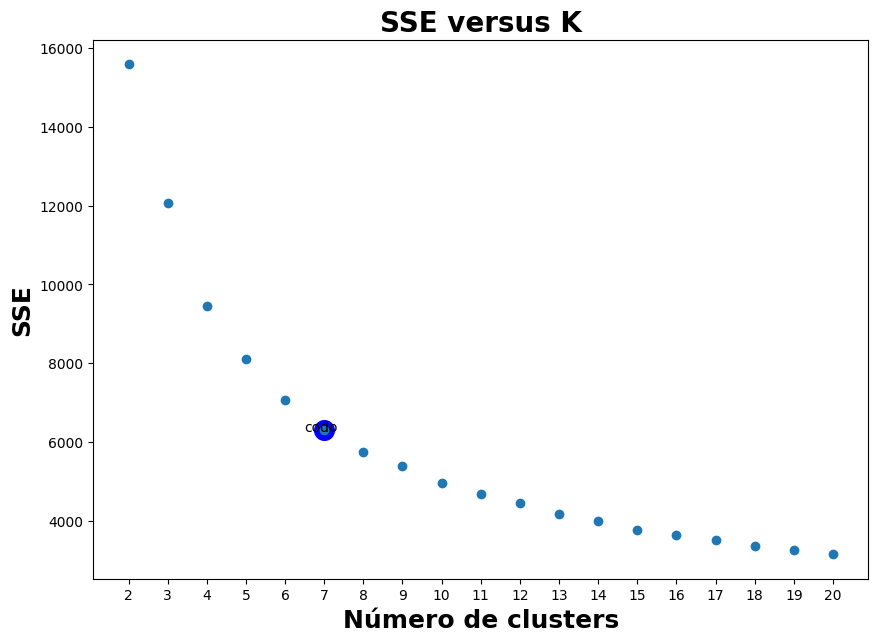

In [50]:
fig, ax = plt.subplots(figsize = (10, 7))

# estas dos lineas se agregan para que se vea la elección de KneeLocator para el codo en este gráfico
ax.scatter(kl.elbow, sse[kl.elbow-2], color='blue', s=200) # agrega un punto rojo al plot de tamaño s=200 en el lugar donde se encuentra el codo
ax.text(kl.elbow-.5, sse[kl.elbow-2]-50, s="codo")       # agrega un texto abajo para indicar qué representa el punto

# estas lineas son el grafico de SS vs K
ax.scatter(range(2, 21), sse)
ax.set_xticks(range(2, 21))
ax.set_xlabel("Número de clusters", fontsize=18, fontweight="bold")
ax.set_ylabel("SSE", fontsize=18, fontweight="bold")
plt.title("SSE versus K", fontsize=20, fontweight="bold")
plt.show()


**Interpretación**

Para complementar el cálculo anterior, se observa en la curva del SSE que a partir de k = 7 la mejora al aumentar los clusters es marginal. Esto sugiere que 7 es un número óptimo de clusters, ya que valores mayores no reducen significativamente el error. Aunque pueden existir pequeñas variaciones entre ejecuciones, el valor se ha mantenido estable en k = 7.

### Creación y entrenamiento del modelo

In [51]:
# Primera aplicación de KMeans con todos los datos
kmeans_inicial = KMeans(n_clusters=kl.elbow, n_init=10, random_state = 29)
grupos = kmeans_inicial.fit_predict(XscaledAll)
dataFrameAll['grupo'] = grupos

### Evaluación del modelo

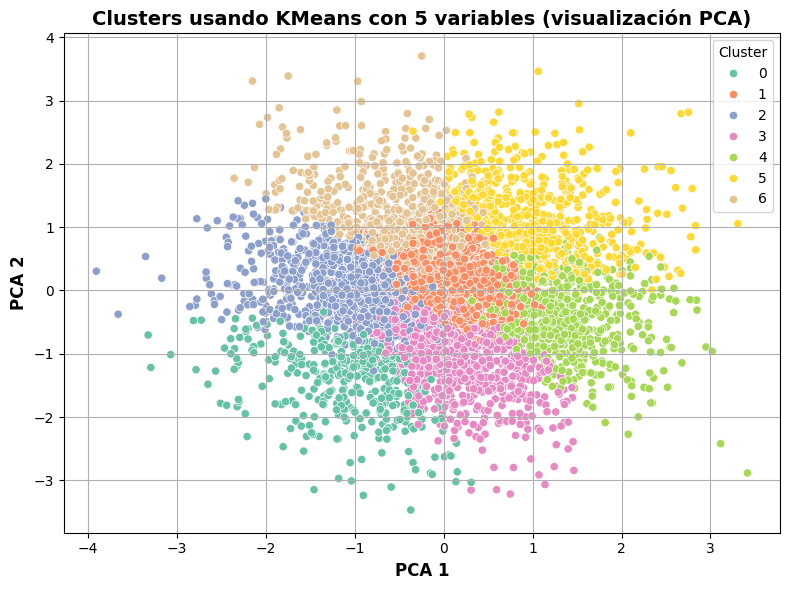

In [52]:
#APLICAMOS PCA SOLO PARA VISUALIZACION
# Visualización usando PCA
# (sólo para graficar clusters originales, por esa razón el número de componentes es 2
pca_visual = PCA(n_components=2)
X_visual = pca_visual.fit_transform(Xscaled)
dataFrameAll['pca1'] = X_visual[:, 0]
dataFrameAll['pca2'] = X_visual[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=dataFrameAll, x='pca1', y='pca2', hue='grupo', palette='Set2')

plt.title("Clusters usando KMeans con 5 variables (visualización PCA)", fontsize=14, fontweight="bold")
plt.xlabel("PCA 1", fontsize=12, fontweight="bold")
plt.ylabel("PCA 2", fontsize=12, fontweight="bold")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


In [53]:
# Silhouette Score en espacio original
silhouette_orig = silhouette_score(XscaledAll, grupos)
print(f"Silhouette Score (espacio original): {silhouette_orig:.4f}")

Silhouette Score (espacio original): 0.2681


**Análisis Y evaluación de los grupos generados**

Al observar el gráfico, se distingue que, si bien los datos presentan cierto grado de agrupamiento, no existe una delimitación clara entre los clusters; los bordes de cada grupo resultan difusos. Además, se evidencia la presencia de puntos solapados entre diferentes grupos(ejemplo puntos del cluster 3 y del cluster 0), lo que sugiere una superposición entre ellos. Esta interpretación se valida al considerar el Silhouette Score obtenido, de 0.2681, que indica una cohesión y separación entre grupos moderadamente bajas.


In [54]:
#Obtenemos los centroides escalados pero como estando escalados carecen de interpretabilidad debemos pasarlo a escala original
centroides_all = kmeans_inicial.cluster_centers_
print(centroides_all)

[[-1.78106627 -1.77718332 -1.77586053  0.23077991  0.18347549]
 [ 0.21537263  0.21952064  0.20488167 -0.02489052  0.00678806]
 [-0.79045415 -0.78841418 -0.78168315 -0.83003479 -0.83240378]
 [-0.65834266 -0.65450062 -0.65600164  0.9075484   0.89944592]
 [ 0.6752987   0.66648841  0.68101577  1.22232501  1.20113007]
 [ 1.5599895   1.55092361  1.5585016  -0.07048448 -0.06207119]
 [ 0.50520126  0.50531879  0.50095529 -1.30113743 -1.3013056 ]]


In [55]:
# Obtiene los centroides en escala original
centroides_all_originales = scaler.inverse_transform(centroides_all)

In [56]:

df_all_centroides = pd.DataFrame(centroides_all_originales, columns=data.columns).round(2)
df_all_centroides['cluster'] = range(kl.elbow)
df_all_centroides

,actividad_fisica,pasos_diarios,calorias_gastadas,horas_de_sueno,nivel_descanso,cluster
0,2.35,4625.89,928.53,7.67,76.57,0
1,5.33,10677.15,2128.54,7.49,75.08,1
2,3.83,7622.48,1530.84,6.93,68.01,2
3,4.02,8028.32,1606.99,8.15,82.60,3
4,6.02,12031.75,2417.00,8.37,85.15,4
5,7.34,14712.14,2948.61,7.46,74.50,5
6,5.76,11543.30,2307.91,6.60,64.06,6


**Análisis**

Cluster 6
  + Los usuarios de este grupo presentan un promedio de 5 horas de actividad fisica semanal, un promedio de 11543 pasos diarios, un promedio de 2307 calorias quemadas por actividad, un promedio de 6.6 horas de sueño nocturno y un nivel de descanso promedio de 64.

### Aplicación de PCA


Varianza explicada por cada componente:
Componente 1: 0.5927  |  Acumulada: 0.5927
Componente 2: 0.3624  |  Acumulada: 0.9552
Componente 3: 0.0375  |  Acumulada: 0.9926
Componente 4: 0.0055  |  Acumulada: 0.9982
Componente 5: 0.0018  |  Acumulada: 1.0000


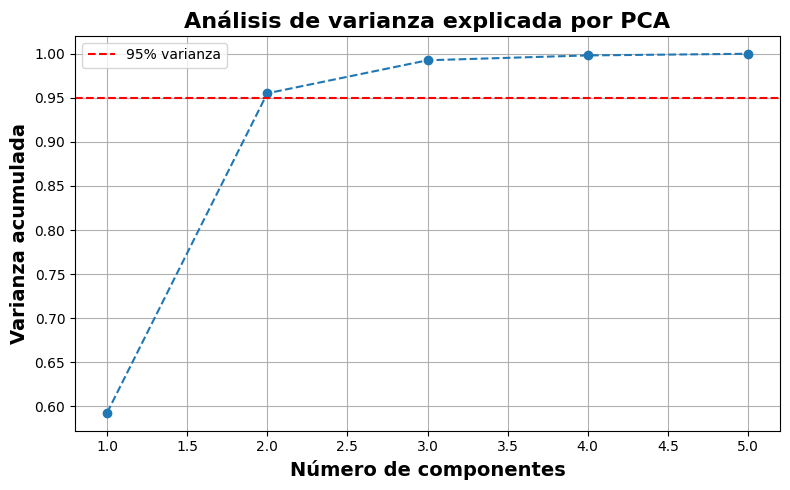


Número de componentes que explican >=95.0% de la varianza: 2


In [57]:

# Análisis de varianza explicada por PCA
pca_full = PCA()
X_pca_full = pca_full.fit_transform(XscaledAll)

# Varianza explicada por cada componente
varianza_explicada = pca_full.explained_variance_ratio_
varianza_explicada_acumulada = np.cumsum(varianza_explicada)

# Mostrar tabla con varianza explicada
print("\nVarianza explicada por cada componente:")
for i, (v_ind, v_acum) in enumerate(zip(varianza_explicada, varianza_explicada_acumulada), 1):
    print(f"Componente {i}: {v_ind:.4f}  |  Acumulada: {v_acum:.4f}")

# Visualizar varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_explicada) + 1), varianza_explicada_acumulada, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% varianza')
plt.xlabel('Número de componentes', fontsize=14, fontweight="bold")
plt.ylabel('Varianza acumulada', fontsize=14, fontweight="bold")
plt.title('Análisis de varianza explicada por PCA', fontsize=16, fontweight="bold")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Elegir número óptimo de componentes (>= 95% varianza)
umbral = 0.95
n_componentes_optimos = np.argmax(varianza_explicada_acumulada >= umbral) + 1
print(f"\nNúmero de componentes que explican >={umbral*100}% de la varianza: {n_componentes_optimos}")

-------------------------------------------------------
Porcentaje de varianza explicada por cada componente
-------------------------------------------------------
[0.59271584 0.362438   0.03747788 0.00552408 0.00184421]


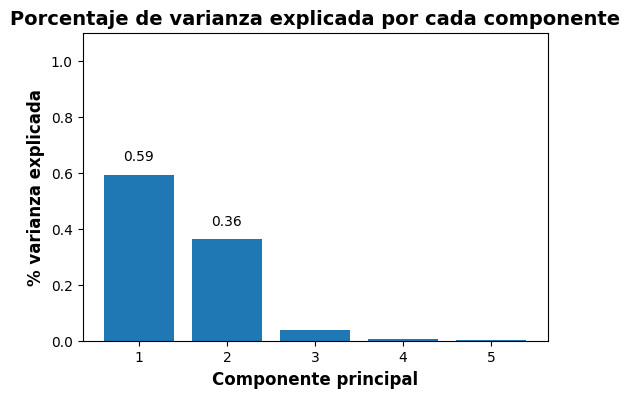

In [58]:
print('-'*55)
print('Porcentaje de varianza explicada por cada componente')
print('-'*55)
print(pca_full.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca_full.n_components_) + 1,
    height = pca_full.explained_variance_ratio_
)

for x, y in zip(np.arange(len(features)) + 1, pca_full.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca_full.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente', fontsize=14, fontweight="bold")
ax.set_xlabel('Componente principal', fontsize=12, fontweight="bold")
ax.set_ylabel('% varianza explicada', fontsize=12, fontweight="bold");

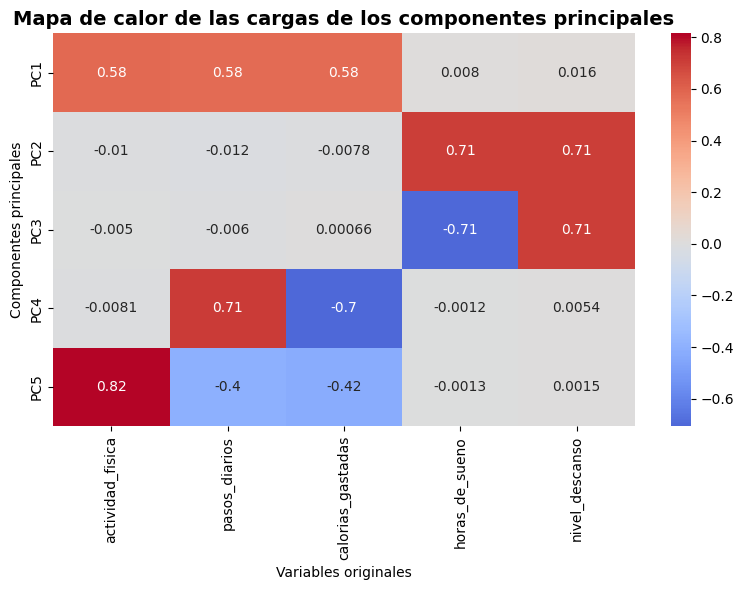

In [59]:
features = XscaledAll.columns if hasattr(XscaledAll, "columns") else list(dataFrameAll.columns[:-3])
loadings = pd.DataFrame(
    pca_full.components_,
    columns=features,
    index=[f'PC{i+1}' for i in range(len(pca_full.components_))]
)

# 3. Graficar el mapa de calor de las cargas
plt.figure(figsize=(8, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de calor de las cargas de los componentes principales", fontsize=14, fontweight="bold")
plt.xlabel("Variables originales")
plt.ylabel("Componentes principales")
plt.tight_layout()
plt.show()

**Cantidad de componentes principales y justificación**

Tras aplicar PCA, se observó que los dos primeros componentes explican aproximadamente el 95% de la varianza total (59% y 36%, respectivamente). Los componentes restantes explican menos del 3% cada uno, por lo que su aporte es marginal.

El mapa de calor de cargas muestra que el primer componente está fuertemente asociado a las variables de actividad física (actividad_fisica, pasos_diarios, calorias_gastadas), mientras que el segundo componente concentra la varianza de las variables de descanso (horas_de_sueno y nivel_descanso).

Por tanto, se retienen 2 componentes principales(PC1 y PC2)  ya que permiten representar de forma adecuada la estructura del conjunto de datos sin pérdida significativa de información.

In [60]:

# Aplicar PCA con número óptimo de componentes obtenido en el punto anterior
pca = PCA(n_components=n_componentes_optimos)
print(f"Número de componentes seleccionadas: {n_componentes_optimos}")
X_pca = pca.fit_transform(XscaledAll)


Número de componentes seleccionadas: 2


Silhouette Score (espacio PCA): 0.3174


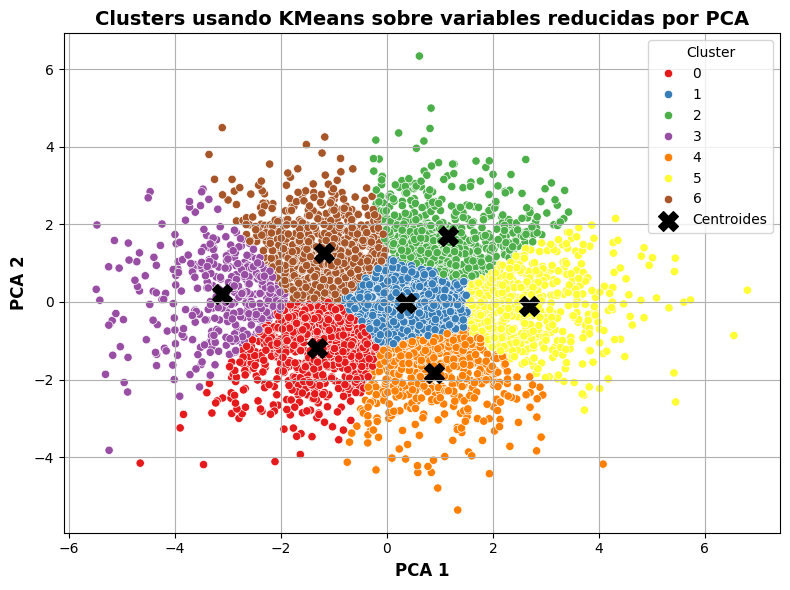

In [61]:
# KMeans sobre las componentes principales
kmeans_pca = KMeans(n_clusters=kl.elbow, n_init=10, random_state=29)
clusters_pca = kmeans_pca.fit_predict(X_pca)

# Visualización del resultado de aplicar KMeans sobre PCA
dataFrameAll['cluster_pca'] = clusters_pca

silhouette_pca = silhouette_score(X_pca, clusters_pca)
print(f"Silhouette Score (espacio PCA): {silhouette_pca:.4f}")

# Obtener los centroides en el espacio PCA
centroides_pca = kmeans_pca.cluster_centers_

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters_pca, palette='Set1')
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            s=200, c='black', marker='X', label='Centroides')
plt.title("Clusters usando KMeans sobre variables reducidas por PCA", fontsize=14, fontweight="bold")
plt.xlabel("PCA 1", fontsize=12, fontweight="bold")
plt.ylabel("PCA 2", fontsize=12, fontweight="bold")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


**Análisis**
Al observar los clusters sobre las variables reducidas mediante PCA, se aprecia una mayor definición en los límites entre los grupos. Si bien aún existe cierto solapamiento entre algunos puntos, este es menor en comparación con el modelo sin reducción de dimensionalidad. Esta mejora visual se ve respaldada por el aumento en el Silhouette Score, que sube a 0.3174, lo cual indica una mejor cohesión interna y separación entre clusters.

In [62]:
# Paso 1: Invertir PCA (pasar del espacio PCA al espacio escalado)
centroides_escalados = pca.inverse_transform(kmeans_pca.cluster_centers_)

# Paso 2: Invertir escalado (pasar del espacio escalado al original)
centroides_originales = scaler.inverse_transform(centroides_escalados)

# Paso 3: Mostrar como DataFrame (opcional)
df_centroides_originales = pd.DataFrame(centroides_originales, columns=features)
print("Centroides en escala original:")
print(df_centroides_originales)


Centroides en escala original:
   actividad_fisica  pasos_diarios  calorias_gastadas  horas_de_sueno  \
0          3.882654    7746.950873        1548.550652        6.917200   
1          5.322421   10645.700475        2131.107658        7.506050   
2          5.980911   11964.452799        2399.174565        8.366240   
3          2.306042    4557.042757         914.255663        7.589610   
4          5.811868   11644.218689        2326.107030        6.603713   
5          7.333619   14705.136677        2942.508572        7.469843   
6          3.961890    7892.425903        1583.874577        8.133156   

   nivel_descanso  
0       67.799378  
1       74.983711  
2       85.359717  
3       75.738249  
4       64.196404  
5       74.714698  
6       82.396740  
